In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('glass0_minority_train.csv',index=False)
df_min=pd.read_csv('glass0_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass0_majority_train.csv',index=False)
df_majority=pd.read_csv('glass0_majority_train.csv')

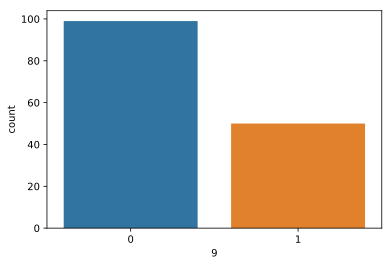

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(44, 5, 10)
(44, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
26/26 [==============================] - 3s 108ms/step - loss: 0.3103
Epoch 2/1000
26/26 [==============================] - 0s 656us/step - loss: 0.3023
Epoch 3/1000
26/26 [==============================] - 0s 733us/step - loss: 0.2932
Epoch 4/1000
26/26 [==============================] - 0s 810us/step - loss: 0.2839
Epoch 5/1000
26/26 [==============================] - 0s 848us/step - loss: 0.2746
Epoch 6/1000
26/26 [==============================] - 0s 885us/step - loss: 0.2654
Epoch 7/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.2564
Epoch 8/1000
26/26 [==============================] - 0s 771us/step - loss: 0.2475
Epoch 9/1000
26/26 [==============================] - 0s 810us/step - loss: 0.2389
Epoch 10/1000
26/26 [==============================] - 0s 926us/step - loss: 0.2306
Epoch 11/1000
26/26 [==============================] - 0s 868us/step - loss: 0.2224
Epoch 12/1000
26/26 [==============================] - 0s 848us/step - loss: 0.2145
Epo

Epoch 99/1000
26/26 [==============================] - 0s 770us/step - loss: 0.0439
Epoch 100/1000
26/26 [==============================] - 0s 732us/step - loss: 0.0439
Epoch 101/1000
26/26 [==============================] - 0s 733us/step - loss: 0.0438
Epoch 102/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0438
Epoch 103/1000
26/26 [==============================] - 0s 836us/step - loss: 0.0438
Epoch 104/1000
26/26 [==============================] - 0s 868us/step - loss: 0.0438
Epoch 105/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0438
Epoch 106/1000
26/26 [==============================] - 0s 868us/step - loss: 0.0437
Epoch 107/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0437
Epoch 108/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0437
Epoch 109/1000
26/26 [==============================] - 0s 752us/step - loss: 0.0437
Epoch 110/1000
26/26 [==============================] - 0s 713us/ste

Epoch 196/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0420
Epoch 197/1000
26/26 [==============================] - 0s 772us/step - loss: 0.0420
Epoch 198/1000
26/26 [==============================] - 0s 925us/step - loss: 0.0420
Epoch 199/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0420
Epoch 200/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0420
Epoch 201/1000
26/26 [==============================] - 0s 893us/step - loss: 0.0419
Epoch 202/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0419
Epoch 203/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0419
Epoch 204/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0419
Epoch 205/1000
26/26 [==============================] - 0s 790us/step - loss: 0.0419
Epoch 206/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0418
Epoch 207/1000
26/26 [==============================] - 0s 791us/

Epoch 293/1000
26/26 [==============================] - 0s 694us/step - loss: 0.0401
Epoch 294/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0401
Epoch 295/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0401
Epoch 296/1000
26/26 [==============================] - 0s 656us/step - loss: 0.0401
Epoch 297/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0400
Epoch 298/1000
26/26 [==============================] - 0s 656us/step - loss: 0.0400
Epoch 299/1000
26/26 [==============================] - 0s 952us/step - loss: 0.0400
Epoch 300/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0400
Epoch 301/1000
26/26 [==============================] - 0s 868us/step - loss: 0.0399
Epoch 302/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0399
Epoch 303/1000
26/26 [==============================] - 0s 926us/step - loss: 0.0399
Epoch 304/1000
26/26 [==============================] - 0s 829us/

Epoch 390/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0379
Epoch 391/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0379
Epoch 392/1000
26/26 [==============================] - 0s 694us/step - loss: 0.0379
Epoch 393/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0378
Epoch 394/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0378
Epoch 395/1000
26/26 [==============================] - 0s 944us/step - loss: 0.0378
Epoch 396/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0378
Epoch 397/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0377
Epoch 398/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0377
Epoch 399/1000
26/26 [==============================] - 0s 983us/step - loss: 0.0377
Epoch 400/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0377
Epoch 401/1000
26/26 [==============================] - 0s 926us/st

Epoch 487/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0350
Epoch 488/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0350
Epoch 489/1000
26/26 [==============================] - 0s 694us/step - loss: 0.0349
Epoch 490/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0349
Epoch 491/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0348
Epoch 492/1000
26/26 [==============================] - 0s 789us/step - loss: 0.0348
Epoch 493/1000
26/26 [==============================] - 0s 868us/step - loss: 0.0348
Epoch 494/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0347
Epoch 495/1000
26/26 [==============================] - 0s 964us/step - loss: 0.0347
Epoch 496/1000
26/26 [==============================] - 0s 868us/step - loss: 0.0346
Epoch 497/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0346
Epoch 498/1000
26/26 [==============================] - 0s 848us/

Epoch 584/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0288
Epoch 585/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0287
Epoch 586/1000
26/26 [==============================] - 0s 655us/step - loss: 0.0286
Epoch 587/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0285
Epoch 588/1000
26/26 [==============================] - 0s 859us/step - loss: 0.0284
Epoch 589/1000
26/26 [==============================] - 0s 791us/step - loss: 0.0283
Epoch 590/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0282
Epoch 591/1000
26/26 [==============================] - 0s 964us/step - loss: 0.0281
Epoch 592/1000
26/26 [==============================] - 0s 925us/step - loss: 0.0279
Epoch 593/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0278
Epoch 594/1000
26/26 [==============================] - 0s 906us/step - loss: 0.0277
Epoch 595/1000
26/26 [==============================] - 0s 906us/

Epoch 681/1000
26/26 [==============================] - 0s 694us/step - loss: 0.0129
Epoch 682/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0128
Epoch 683/1000
26/26 [==============================] - 0s 772us/step - loss: 0.0127
Epoch 684/1000
26/26 [==============================] - 0s 856us/step - loss: 0.0126
Epoch 685/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 686/1000
26/26 [==============================] - 0s 752us/step - loss: 0.0124
Epoch 687/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0123
Epoch 688/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0123
Epoch 689/1000
26/26 [==============================] - 0s 964us/step - loss: 0.0122
Epoch 690/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0121
Epoch 691/1000
26/26 [==============================] - 0s 945us/step - loss: 0.0120
Epoch 692/1000
26/26 [==============================] - 0s 849us/st

Epoch 778/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0083
Epoch 779/1000
26/26 [==============================] - 0s 829us/step - loss: 0.0083
Epoch 780/1000
26/26 [==============================] - 0s 675us/step - loss: 0.0083
Epoch 781/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0082
Epoch 782/1000
26/26 [==============================] - 0s 906us/step - loss: 0.0082
Epoch 783/1000
26/26 [==============================] - 0s 926us/step - loss: 0.0082
Epoch 784/1000
26/26 [==============================] - 0s 926us/step - loss: 0.0082
Epoch 785/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0081
Epoch 786/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 787/1000
26/26 [==============================] - 0s 925us/step - loss: 0.0081
Epoch 788/1000
26/26 [==============================] - 0s 791us/step - loss: 0.0081
Epoch 789/1000
26/26 [==============================] - 0s 771us/st

Epoch 875/1000
26/26 [==============================] - 0s 713us/step - loss: 0.0062
Epoch 876/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0062
Epoch 877/1000
26/26 [==============================] - 0s 675us/step - loss: 0.0062
Epoch 878/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0062
Epoch 879/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 880/1000
26/26 [==============================] - 0s 810us/step - loss: 0.0061
Epoch 881/1000
26/26 [==============================] - 0s 945us/step - loss: 0.0061
Epoch 882/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 883/1000
26/26 [==============================] - 0s 868us/step - loss: 0.0061
Epoch 884/1000
26/26 [==============================] - 0s 848us/step - loss: 0.0061
Epoch 885/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 886/1000
26/26 [==============================] - 0s 906us/step -

Epoch 972/1000
26/26 [==============================] - 0s 771us/step - loss: 0.0047
Epoch 973/1000
26/26 [==============================] - 0s 887us/step - loss: 0.0047
Epoch 974/1000
26/26 [==============================] - 0s 694us/step - loss: 0.0047
Epoch 975/1000
26/26 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 976/1000
26/26 [==============================] - 0s 783us/step - loss: 0.0047
Epoch 977/1000
26/26 [==============================] - 0s 925us/step - loss: 0.0047
Epoch 978/1000
26/26 [==============================] - 0s 945us/step - loss: 0.0046
Epoch 979/1000
26/26 [==============================] - 0s 925us/step - loss: 0.0046
Epoch 980/1000
26/26 [==============================] - 0s 983us/step - loss: 0.0046
Epoch 981/1000
26/26 [==============================] - 0s 964us/step - loss: 0.0046
Epoch 982/1000
26/26 [==============================] - 0s 925us/step - loss: 0.0046
Epoch 983/1000
26/26 [==============================] - 0s 733us/st

In [14]:
model.save('glass0.h5')

In [15]:
Xtrain.shape

(26, 5, 10)

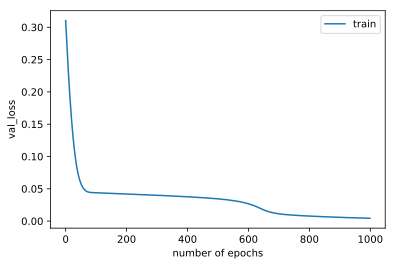

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

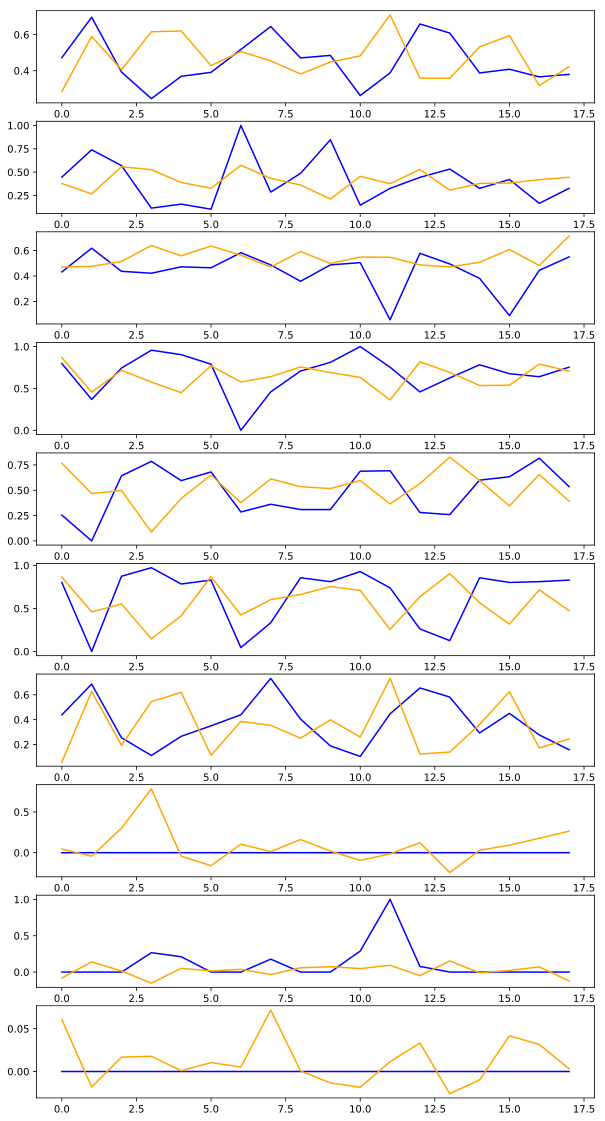

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.84614384e-01,  3.77817959e-01,  4.71356452e-01,
         8.67984474e-01,  7.67830372e-01,  8.62725377e-01,
         5.91069274e-02,  4.46394533e-02, -8.16444606e-02,
         6.08401746e-02],
       [ 5.90509653e-01,  2.67971069e-01,  4.75911260e-01,
         4.56866711e-01,  4.67607528e-01,  4.59971160e-01,
         6.27355754e-01, -4.25744951e-02,  1.40240863e-01,
        -1.81221347e-02],
       [ 4.05069321e-01,  5.58201671e-01,  5.14272690e-01,
         7.16021836e-01,  4.98330951e-01,  5.51488459e-01,
         1.93831533e-01,  3.01594883e-01,  1.49627067e-02,
         1.67796090e-02],
       [ 6.16332829e-01,  5.26140928e-01,  6.39980555e-01,
         5.76385319e-01,  8.83039087e-02,  1.46633923e-01,
         5.45083821e-01,  7.83888459e-01, -1.52491912e-01,
         1.78363919e-02],
       [ 6.20822310e-01,  3.89933556e-01,  5.58557987e-01,
         4.49361324e-01,  4.19184774e-01,  4.14054930e-01,
         6.19943202e-01, -4.34390455e-02,  5.07658757e-02,
         8.

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

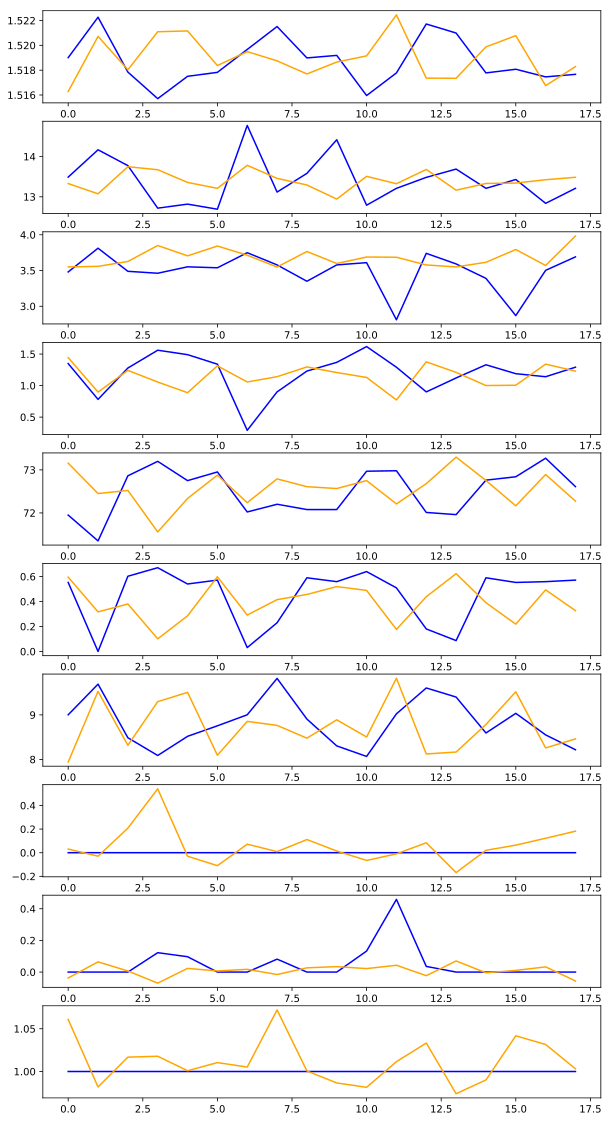

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.84614384e-01,  3.77817959e-01,  4.71356452e-01,
         8.67984474e-01,  7.67830372e-01,  8.62725377e-01,
         5.91069274e-02,  4.46394533e-02, -8.16444606e-02,
         6.08401746e-02],
       [ 5.90509653e-01,  2.67971069e-01,  4.75911260e-01,
         4.56866711e-01,  4.67607528e-01,  4.59971160e-01,
         6.27355754e-01, -4.25744951e-02,  1.40240863e-01,
        -1.81221347e-02],
       [ 4.05069321e-01,  5.58201671e-01,  5.14272690e-01,
         7.16021836e-01,  4.98330951e-01,  5.51488459e-01,
         1.93831533e-01,  3.01594883e-01,  1.49627067e-02,
         1.67796090e-02],
       [ 6.16332829e-01,  5.26140928e-01,  6.39980555e-01,
         5.76385319e-01,  8.83039087e-02,  1.46633923e-01,
         5.45083821e-01,  7.83888459e-01, -1.52491912e-01,
         1.78363919e-02],
       [ 6.20822310e-01,  3.89933556e-01,  5.58557987e-01,
         4.49361324e-01,  4.19184774e-01,  4.14054930e-01,
         6.19943202e-01, -4.34390455e-02,  5.07658757e-02,
         8.

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)